In [74]:
import tweepy
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import requests
import json
import os

Gathering the Data

In [75]:
#csv
archive = pd.read_csv('twitter-archive-enhanced.csv')


In [76]:
#API
from tweepy import OAuthHandler
from timeit import default_timer as timer
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = archive.tweet_id.values
len(tweet_ids)


def tweet_extraction():
    count = 0
    fails_dict = {}
    start = timer()
    with open('tweet_json.txt', 'w') as outfile:
        for tweet_id in tweet_ids:
            count += 1
            print(str(count) + ": " + str(tweet_id))
            try:
                tweet = api.get_status(tweet_id, tweet_mode='extended')
                print("Success")
                json.dump(tweet._json, outfile)
                outfile.write('\n')
            except tweepy.TweepError as e:
                print("Fail")
                fails_dict[tweet_id] = e
                pass
    end = timer()
    print(end - start)
    print(fails_dict)

In [77]:
#API
my_demo_list = []
with open('tweet_json.txt', encoding='utf-8') as json_file:  
    all_data = json.load(json_file)
    for each_dictionary in all_data:
        tweet_id = each_dictionary['id']
        whole_tweet = each_dictionary['text']
        only_url = whole_tweet[whole_tweet.find('https'):]
        favorite_count = each_dictionary['favorite_count']
        retweet_count = each_dictionary['retweet_count']
        followers_count = each_dictionary['user']['followers_count']
        friends_count = each_dictionary['user']['friends_count']
        whole_source = each_dictionary['source']
        only_device = whole_source[whole_source.find('rel="nofollow">') + 15:-4]
        source = only_device
        retweeted_status = each_dictionary['retweeted_status'] = each_dictionary.get('retweeted_status', 'Original tweet')
        if retweeted_status == 'Original tweet':
            url = only_url
        else:
            retweeted_status = 'This is a retweet'
            url = 'This is a retweet'

        my_demo_list.append({'tweet_id': str(tweet_id),
                             'favorite_count': int(favorite_count),
                             'retweet_count': int(retweet_count),
                             'followers_count': int(followers_count),
                             'friends_count': int(friends_count),
                             'url': url,
                             'source': source,
                             'retweeted_status': retweeted_status,
                            })
        tweet_json = pd.DataFrame(my_demo_list, columns = ['tweet_id', 'favorite_count','retweet_count', 
                                                           'followers_count', 'friends_count','source', 
                                                           'retweeted_status', 'url'])

In [78]:
#URL downloaded programatically 
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
response = requests.get(url)

with open('image-predictions.tsv', mode ='wb') as file:
    file.write(response.content)

#Read TSV file
image_prediction = pd.read_csv('image-predictions.tsv', sep='\t' )

In [79]:

tweet_json.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2345 entries, 0 to 2344
Data columns (total 8 columns):
tweet_id            2345 non-null object
favorite_count      2345 non-null int64
retweet_count       2345 non-null int64
followers_count     2345 non-null int64
friends_count       2345 non-null int64
source              2345 non-null object
retweeted_status    2345 non-null object
url                 2345 non-null object
dtypes: int64(4), object(4)
memory usage: 146.6+ KB


In [80]:
archive.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

Assessing the Data


In [81]:
archive

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [82]:

image_prediction

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [83]:
tweet_json

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892420643555336193,38841,8601,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MgUWQ76dJU
1,892177421306343426,33266,6320,6831327,103,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
2,891815181378084864,25063,4194,6831327,103,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
3,891689557279858688,42214,8714,6831327,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
4,891327558926688256,40361,9486,6831327,103,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
5,891087950875897856,20244,3137,6831327,103,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
6,890971913173991426,11864,2090,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
7,890729181411237888,65620,19066,6831327,103,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
8,890609185150312448,27795,4300,6831327,103,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
9,890240255349198849,31983,7480,6831327,103,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0


In [84]:
archive[['rating_numerator', 'rating_denominator']].describe()

,rating_numerator,rating_denominator
count,2356.000000,2356.000000
mean,13.126486,10.455433
std,45.876648,6.745237
min,0.000000,0.000000
25%,10.000000,10.000000
50%,11.000000,10.000000
75%,12.000000,10.000000
max,1776.000000,170.000000


In [85]:
archive.name.unique()

array(['Phineas', 'Tilly', 'Archie', 'Darla', 'Franklin', 'None', 'Jax',
       'Zoey', 'Cassie', 'Koda', 'Bruno', 'Ted', 'Stuart', 'Oliver',
       'Jim', 'Zeke', 'Ralphus', 'Canela', 'Gerald', 'Jeffrey', 'such',
       'Maya', 'Mingus', 'Derek', 'Roscoe', 'Waffles', 'Jimbo', 'Maisey',
       'Lilly', 'Earl', 'Lola', 'Kevin', 'Yogi', 'Noah', 'Bella',
       'Grizzwald', 'Rusty', 'Gus', 'Stanley', 'Alfy', 'Koko', 'Rey',
       'Gary', 'a', 'Elliot', 'Louis', 'Jesse', 'Romeo', 'Bailey',
       'Duddles', 'Jack', 'Emmy', 'Steven', 'Beau', 'Snoopy', 'Shadow',
       'Terrance', 'Aja', 'Penny', 'Dante', 'Nelly', 'Ginger', 'Benedict',
       'Venti', 'Goose', 'Nugget', 'Cash', 'Coco', 'Jed', 'Sebastian',
       'Walter', 'Sierra', 'Monkey', 'Harry', 'Kody', 'Lassie', 'Rover',
       'Napolean', 'Dawn', 'Boomer', 'Cody', 'Rumble', 'Clifford',
       'quite', 'Dewey', 'Scout', 'Gizmo', 'Cooper', 'Harold', 'Shikha',
       'Jamesy', 'Lili', 'Sammy', 'Meatball', 'Paisley', 'Albus',
       'Nept

In [86]:
archive.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [87]:
archive[archive.name.str.islower()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [88]:
image_prediction.img_num.value_counts()

1    1780
2     198
3      66
4      31
Name: img_num, dtype: int64

In [89]:
image_prediction.p1.unique()

array(['Welsh_springer_spaniel', 'redbone', 'German_shepherd',
       'Rhodesian_ridgeback', 'miniature_pinscher',
       'Bernese_mountain_dog', 'box_turtle', 'chow', 'shopping_cart',
       'miniature_poodle', 'golden_retriever', 'Gordon_setter',
       'Walker_hound', 'pug', 'bloodhound', 'Lhasa', 'English_setter',
       'hen', 'desktop_computer', 'Italian_greyhound', 'Maltese_dog',
       'three-toed_sloth', 'ox', 'malamute', 'guinea_pig',
       'soft-coated_wheaten_terrier', 'Chihuahua',
       'black-and-tan_coonhound', 'coho', 'toy_terrier',
       'Blenheim_spaniel', 'Pembroke', 'llama',
       'Chesapeake_Bay_retriever', 'curly-coated_retriever', 'dalmatian',
       'Ibizan_hound', 'Border_collie', 'Labrador_retriever', 'seat_belt',
       'snail', 'miniature_schnauzer', 'Airedale', 'triceratops', 'swab',
       'hay', 'hyena', 'jigsaw_puzzle', 'West_Highland_white_terrier',
       'toy_poodle', 'giant_schnauzer', 'vizsla', 'vacuum', 'Rottweiler',
       'Siberian_husky', 't

In [90]:
image_prediction.sample(10)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1611,801285448605831168,https://pbs.twimg.com/media/Cx683NPUAAAjyU4.jpg,1,minivan,0.789376,False,beach_wagon,0.081125,False,convertible,0.064534,False
1994,874057562936811520,https://pbs.twimg.com/media/DCFGtdoXkAEsqIw.jpg,1,flat-coated_retriever,0.832177,True,black-and-tan_coonhound,0.040437,True,Newfoundland,0.028228,True
950,704859558691414016,https://pbs.twimg.com/media/CcgqBNVW8AE76lv.jpg,1,pug,0.284428,True,teddy,0.156339,False,mitten,0.138915,False
883,698907974262222848,https://pbs.twimg.com/media/CbMFFssWIAAyuOd.jpg,3,German_short-haired_pointer,0.983131,True,bluetick,0.005558,True,curly-coated_retriever,0.003322,True
1351,759846353224826880,https://pbs.twimg.com/media/CouEOZhWAAAgFpE.jpg,1,Sussex_spaniel,0.355395,True,vizsla,0.141094,True,otterhound,0.092198,True
61,667152164079423490,https://pbs.twimg.com/media/CUIzWk_UwAAfUNq.jpg,1,toy_poodle,0.535411,True,Pomeranian,0.087544,True,miniature_poodle,0.062050,True
244,670465786746662913,https://pbs.twimg.com/media/CU35E7VWEAAKYBy.jpg,1,axolotl,0.611558,False,tailed_frog,0.186484,False,common_newt,0.078694,False
1837,837366284874571778,https://pbs.twimg.com/media/C57sMJwXMAASBSx.jpg,1,American_Staffordshire_terrier,0.660085,True,Staffordshire_bullterrier,0.334947,True,dalmatian,0.002697,True
276,670840546554966016,https://pbs.twimg.com/media/CU9N6upXAAAbtQe.jpg,1,Shih-Tzu,0.963622,True,Lhasa,0.016017,True,guinea_pig,0.007932,False
704,684926975086034944,https://pbs.twimg.com/media/CYFZXdiU0AAc_kw.jpg,1,Labrador_retriever,0.769412,True,golden_retriever,0.144893,True,lion,0.021440,False


In [91]:
sum(image_prediction.jpg_url.duplicated())

66

In [92]:

tweet_json.sample(10)

,tweet_id,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
2077,670792680469889025,867,293,6831420,103,Twitter for iPhone,Original tweet,https://t.co/gTy4WMXu8l
1252,710117014656950272,5870,2177,6831383,103,Twitter for iPhone,Original tweet,https://t.co/h1OX2mLtxV
1350,703079050210877440,7907,3382,6831384,103,Twitter for iPhone,Original tweet,https://t.co/hMjzhdUHaW
1714,680070545539371008,2749,962,6831388,103,TweetDeck,Original tweet,https://t.co/Fh7geodBCU
1328,704871453724954624,4543,1217,6831384,103,Twitter for iPhone,Original tweet,https://t.co/mIQ1KoVsmU
23,887343217045368832,33731,10495,6831118,103,Twitter for iPhone,Original tweet,https://t.co/WZqNqygEyV
2134,669926384437997569,394,111,6831421,103,Twitter for iPhone,Original tweet,https://t.co/9RYY2NtHDw
496,812781120811126785,8253,2152,6831335,103,Twitter for iPhone,Original tweet,https://t.co/lXFM1l22bG
1185,717047459982213120,6681,2080,6831383,103,Twitter for iPhone,Original tweet,https://t.co/fGgleFiBPq
216,849776966551130114,32077,8222,6831331,103,Twitter for iPhone,Original tweet,https://t.co/JSflLuOMob


In [93]:
tweet_json.retweeted_status.value_counts()

Original tweet       2175
This is a retweet     170
Name: retweeted_status, dtype: int64

In [94]:
tweet_json.source.value_counts()

Twitter for iPhone     2210
Vine - Make a Scene      91
Twitter Web Client       33
TweetDeck                11
Name: source, dtype: int64

Quality

Completeness, validity, accuracy, consistency (content issues)

twitter_archive


1-Keep original ratings (no retweets) that have images

2-Delete columns that won't be used for analysis

3-Erroneous datatypes (doggo, floofer, pupper and puppo columns)

4- convert timestamp to datetime and Separate timestamp into day - month - year (3 columns)


5-archive_clean: tweet_id dtype "string"

6-Change tweet_id to type int64 

7- Columns (doggo, floofer, pupper, puppo) has None for missing values.



image_prediction


1-Drop 66 jpg_url duplicated


2-Delete columns that won't be used for analysis

3-image_clean: tweet_id dtype "string"




tweet_json

1-Keep original tweets only

-Tidiness


1-All datasets should be combined into 1 dataset only

2- doggo, floofer, pupper, puppo columns are all about the same things, a kind of dog personality.





Cleaning Data

In [95]:
archive_clean = archive.copy()
image_prediction_clean = image_prediction.copy()
tweet_json_clean = tweet_json.copy()

 Twitter archive - keep original ratings (no retweets) that have images.

In [96]:
#CODE: Delete retweets by filtering the NaN of retweeted_status_user_id
archive_clean = archive_clean[pd.isnull(archive_clean['retweeted_status_user_id'])]

#TEST
print(sum(archive_clean.retweeted_status_user_id.value_counts()))

0


 Twitter archive - Delete columns that won't be used for analysis

In [97]:
print(list(archive_clean))

#CODE: Delete columns no needed
archive_clean = archive_clean.drop(['source',
                                                    'in_reply_to_status_id',
                                                    'in_reply_to_user_id',
                                                    'retweeted_status_id',
                                                    'retweeted_status_user_id', 
                                                    'retweeted_status_timestamp', 
                                                    'expanded_urls'], 1)

['tweet_id', 'in_reply_to_status_id', 'in_reply_to_user_id', 'timestamp', 'source', 'text', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp', 'expanded_urls', 'rating_numerator', 'rating_denominator', 'name', 'doggo', 'floofer', 'pupper', 'puppo']


In [98]:
#TEST
list(archive_clean)

['tweet_id',
 'timestamp',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo']

 Twitter_archive - Erroneous datatypes (doggo, floofer, pupper and puppo columns)

In [99]:
# First replace None in stage columns with empty string as follows.
archive_clean.doggo.replace('None', '', inplace=True) 
# Like this do replacements for all four stages
archive_clean.floofer.replace('None', '', inplace=True)
archive_clean.pupper.replace('None', '', inplace=True)
archive_clean.puppo.replace('None', '', inplace=True)

# Then combine stage columns.
archive_clean['dog_stage'] = archive_clean.doggo + archive_clean.floofer + archive_clean.pupper + archive_clean.puppo

# Then format entries with multiple dog stages which appeared like doggopupper.

archive_clean.loc[archive_clean.dog_stage == 'doggopupper', 'dog_stage'] = 'doggo,pupper' 
archive_clean.loc[archive_clean.dog_stage == 'doggopuppo', 'dog_stage'] = 'doggo,puppo' 
archive_clean.loc[archive_clean.dog_stage == 'doggofloofer', 'dog_stage'] = 'doggo,floofer'
archive_clean


,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,,,,,
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo


In [100]:

archive_clean.dog_stage.value_counts()

                 1831
pupper            224
doggo              75
puppo              24
doggo,pupper       10
floofer             9
doggo,floofer       1
doggo,puppo         1
Name: dog_stage, dtype: int64

In [101]:
archive_clean

,tweet_id,timestamp,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage
0,892420643555336193,2017-08-01 16:23:56 +0000,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,,,,,
1,892177421306343426,2017-08-01 00:17:27 +0000,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,
2,891815181378084864,2017-07-31 00:18:03 +0000,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,
3,891689557279858688,2017-07-30 15:58:51 +0000,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,
4,891327558926688256,2017-07-29 16:00:24 +0000,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,
5,891087950875897856,2017-07-29 00:08:17 +0000,Here we have a majestic great white breaching ...,13,10,None,,,,,
6,890971913173991426,2017-07-28 16:27:12 +0000,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,
7,890729181411237888,2017-07-28 00:22:40 +0000,When you watch your owner call another dog a g...,13,10,None,,,,,
8,890609185150312448,2017-07-27 16:25:51 +0000,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,
9,890240255349198849,2017-07-26 15:59:51 +0000,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo


Tidiness: Separate timestamp into day - month - year (3 columns)
 
 
Quality:convert timestamp to datetime
 
 
convert timestamp to datetime and Separate timestamp into day - month - year (3 columns)

In [102]:
#CODE: convert timestamp to datetime
archive_clean['timestamp'] = pd.to_datetime(archive_clean['timestamp'])

#extract year, month and day to new columns
archive_clean['year'] = archive_clean['timestamp'].dt.year
archive_clean['month'] = archive_clean['timestamp'].dt.month
archive_clean['day'] = archive_clean['timestamp'].dt.day

#Finally drop timestamp column
archive_clean = archive_clean.drop('timestamp', 1)

#TEST
list(archive_clean)

['tweet_id',
 'text',
 'rating_numerator',
 'rating_denominator',
 'name',
 'doggo',
 'floofer',
 'pupper',
 'puppo',
 'dog_stage',
 'year',
 'month',
 'day']

Image_prediction 

Drop 66 jpg_url duplicated

In [103]:
#CODE: the first true prediction (p1, p2 or p3) will be store in these lists
dog_type = []
confidence_list = []

#create a function with nested if to capture the dog type and confidence level
# from the first 'true' prediction
def image(image_prediction_clean):
    if image_prediction_clean['p1_dog'] == True:
        dog_type.append(image_prediction_clean['p1'])
        confidence_list.append(image_prediction_clean['p1_conf'])
    elif image_prediction_clean['p2_dog'] == True:
        dog_type.append(image_prediction_clean['p2'])
        confidence_list.append(image_prediction_clean['p2_conf'])
    elif image_prediction_clean['p3_dog'] == True:
        dog_type.append(image_prediction_clean['p3'])
        confidence_list.append(image_prediction_clean['p3_conf'])
    else:
        dog_type.append('Error')
        confidence_list.append('Error')

#series objects having index the image_prediction_clean column.        
image_prediction_clean.apply(image, axis=1)

#create new columns
image_prediction_clean['dog_type'] = dog_type
image_prediction_clean['confidence_list'] = confidence_list

#drop rows that has prediction_list 'error'
image_prediction_clean = image_prediction_clean[image_prediction_clean['dog_type'] != 'Error']

#TEST: 
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1751 entries, 0 to 2073
Data columns (total 14 columns):
tweet_id           1751 non-null int64
jpg_url            1751 non-null object
img_num            1751 non-null int64
p1                 1751 non-null object
p1_conf            1751 non-null float64
p1_dog             1751 non-null bool
p2                 1751 non-null object
p2_conf            1751 non-null float64
p2_dog             1751 non-null bool
p3                 1751 non-null object
p3_conf            1751 non-null float64
p3_dog             1751 non-null bool
dog_type           1751 non-null object
confidence_list    1751 non-null object
dtypes: bool(3), float64(3), int64(2), object(6)
memory usage: 169.3+ KB


In [104]:
#CODE: Delete duplicated jpg_url
image_prediction_clean = image_prediction_clean.drop_duplicates(subset=['jpg_url'], keep='last')

#TEST
sum(image_prediction_clean['jpg_url'].duplicated())

0

Image_prediction

Delete columns that won't be used for analysis

In [105]:
#CODE: print list of image_prediction columns
print(list(image_prediction_clean))

#Delete columns
image_prediction_clean = image_prediction_clean.drop(['img_num', 'p1', 
                                                      'p1_conf', 'p1_dog', 
                                                      'p2', 'p2_conf', 
                                                      'p2_dog', 'p3', 
                                                      'p3_conf', 
                                                      'p3_dog'], 1)

#TEST
list(image_prediction_clean)

['tweet_id', 'jpg_url', 'img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog', 'dog_type', 'confidence_list']


['tweet_id', 'jpg_url', 'dog_type', 'confidence_list']

image_clean:3- tweet_id dtype "string"



archive_clean: 5- tweet_id dtype "string"


In [106]:
image_prediction_clean['tweet_id'] = image_prediction_clean['tweet_id'].astype('str')

archive_clean['tweet_id'] = archive_clean['tweet_id'].astype('str')

In [107]:
image_prediction_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1691 entries, 0 to 2073
Data columns (total 4 columns):
tweet_id           1691 non-null object
jpg_url            1691 non-null object
dog_type           1691 non-null object
confidence_list    1691 non-null object
dtypes: object(4)
memory usage: 66.1+ KB


In [108]:
archive_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 13 columns):
tweet_id              2175 non-null object
text                  2175 non-null object
rating_numerator      2175 non-null int64
rating_denominator    2175 non-null int64
name                  2175 non-null object
doggo                 2175 non-null object
floofer               2175 non-null object
pupper                2175 non-null object
puppo                 2175 non-null object
dog_stage             2175 non-null object
year                  2175 non-null int64
month                 2175 non-null int64
day                   2175 non-null int64
dtypes: int64(5), object(8)
memory usage: 237.9+ KB


Tweet_json 

1-keep  original tweets

In [109]:
#CODE:
tweet_json_clean = tweet_json_clean[tweet_json_clean['retweeted_status'] == 'Original tweet']

#TEST
tweet_json_clean['retweeted_status'].value_counts()

Original tweet    2175
Name: retweeted_status, dtype: int64



create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean

In [110]:
#CODE: create a new dataframe that merge twitter_archive_clean and 
#image_prediction_clean
df_twitter1 = pd.merge(archive_clean, 
                      image_prediction_clean, 
                      how = 'left', on = ['tweet_id'])

#keep rows that have picture (jpg_url)
df_twitter1 = df_twitter1[df_twitter1['jpg_url'].notnull()]

#TEST
df_twitter1.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 1 to 2174
Data columns (total 16 columns):
tweet_id              1626 non-null object
text                  1626 non-null object
rating_numerator      1626 non-null int64
rating_denominator    1626 non-null int64
name                  1626 non-null object
doggo                 1626 non-null object
floofer               1626 non-null object
pupper                1626 non-null object
puppo                 1626 non-null object
dog_stage             1626 non-null object
year                  1626 non-null int64
month                 1626 non-null int64
day                   1626 non-null int64
jpg_url               1626 non-null object
dog_type              1626 non-null object
confidence_list       1626 non-null object
dtypes: int64(5), object(11)
memory usage: 216.0+ KB


In [111]:
#CODE: create a new dataframe that merge df_twitter and tweet_json_clean
df_twitter = pd.merge(df_twitter1, tweet_json_clean, 
                      how = 'left', on = ['tweet_id'])

#TEST
df_twitter.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1626 entries, 0 to 1625
Data columns (total 23 columns):
tweet_id              1626 non-null object
text                  1626 non-null object
rating_numerator      1626 non-null int64
rating_denominator    1626 non-null int64
name                  1626 non-null object
doggo                 1626 non-null object
floofer               1626 non-null object
pupper                1626 non-null object
puppo                 1626 non-null object
dog_stage             1626 non-null object
year                  1626 non-null int64
month                 1626 non-null int64
day                   1626 non-null int64
jpg_url               1626 non-null object
dog_type              1626 non-null object
confidence_list       1626 non-null object
favorite_count        1626 non-null int64
retweet_count         1626 non-null int64
followers_count       1626 non-null int64
friends_count         1626 non-null int64
source                1626 non-null object

Change tweet_id to type int64 

In [112]:
#CODE: change tweet_id from str to int
tweet_json_clean['tweet_id'] = tweet_json_clean['tweet_id'].astype(np.int64)

#TEST
tweet_json_clean['tweet_id'].dtypes

dtype('int64')

Storing, Analyzing, and Visualizing Data

In [113]:
#Store the clean DataFrame in a CSV file
df_twitter.to_csv('twitter_archive_master.csv', 
                 index=False, encoding = 'utf-8')

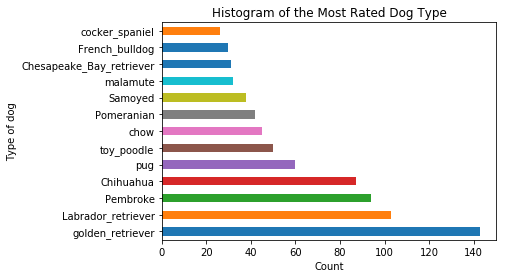

In [114]:
df_dog_type = df_twitter.groupby('dog_type').filter(lambda x: len(x) >= 25)

df_dog_type['dog_type'].value_counts().plot(kind = 'barh')
plt.title('Histogram of the Most Rated Dog Type')
plt.xlabel('Count')
plt.ylabel('Type of dog')

fig = plt.gcf() 
fig.savefig('output.png',bbox_inches='tight')

In [115]:

df_twitter

,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,...,jpg_url,dog_type,confidence_list,favorite_count,retweet_count,followers_count,friends_count,source,retweeted_status,url
0,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,,...,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581,33266,6320,6831327,103,Twitter for iPhone,Original tweet,https://t.co/aQFSeaCu9L
1,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,,...,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012,25063,4194,6831327,103,Twitter for iPhone,Original tweet,https://t.co/r0YlrsGCgy
2,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,,...,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086,42214,8714,6831327,103,Twitter for iPhone,Original tweet,https://t.co/tD36da7qLQ
3,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,,...,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712,40361,9486,6831327,103,Twitter for iPhone,Original tweet,https://t.co/0g0KMIVXZ3
4,891087950875897856,Here we have a majestic great white breaching ...,13,10,None,,,,,,...,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595,20244,3137,6831327,103,Twitter for iPhone,Original tweet,https://t.co/xx5cilW0Dd
5,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,,...,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703,11864,2090,6831327,103,Twitter for iPhone,Original tweet,https://t.co/MV01Q820LT
6,890729181411237888,When you watch your owner call another dog a g...,13,10,None,,,,,,...,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142,65620,19066,6831327,103,Twitter for iPhone,Original tweet,https://t.co/hrcFOGi12V
7,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,,...,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574,27795,4300,6831327,103,Twitter for iPhone,Original tweet,https://t.co/UkrdQyoYxV
8,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo,...,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319,31983,7480,6831327,103,Twitter for iPhone,Original tweet,https://t.co/l3TSS3o2M0
9,890006608113172480,This is Koda. He is a South Australian decksha...,13,10,Koda,,,,,,...,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979,30687,7399,6831327,103,Twitter for iPhone,Original tweet,https://t.co/jy2alqaYPH


In [116]:
df_twitter1


,tweet_id,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_stage,year,month,day,jpg_url,dog_type,confidence_list
1,892177421306343426,This is Tilly. She's just checking pup on you....,13,10,Tilly,,,,,,2017,8,1,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,Chihuahua,0.323581
2,891815181378084864,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,,,,,,2017,7,31,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,Chihuahua,0.716012
3,891689557279858688,This is Darla. She commenced a snooze mid meal...,13,10,Darla,,,,,,2017,7,30,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,Labrador_retriever,0.168086
4,891327558926688256,This is Franklin. He would like you to stop ca...,12,10,Franklin,,,,,,2017,7,29,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,basset,0.555712
5,891087950875897856,Here we have a majestic great white breaching ...,13,10,None,,,,,,2017,7,29,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,Chesapeake_Bay_retriever,0.425595
6,890971913173991426,Meet Jax. He enjoys ice cream so much he gets ...,13,10,Jax,,,,,,2017,7,28,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,Appenzeller,0.341703
7,890729181411237888,When you watch your owner call another dog a g...,13,10,None,,,,,,2017,7,28,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,Pomeranian,0.566142
8,890609185150312448,This is Zoey. She doesn't want to be one of th...,13,10,Zoey,,,,,,2017,7,27,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,Irish_terrier,0.487574
9,890240255349198849,This is Cassie. She is a college pup. Studying...,14,10,Cassie,doggo,,,,doggo,2017,7,26,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,Pembroke,0.511319
10,890006608113172480,This is Koda. He is a South Australian decksha...,13,10,Koda,,,,,,2017,7,26,https://pbs.twimg.com/media/DFnwSY4WAAAMliS.jpg,Samoyed,0.957979


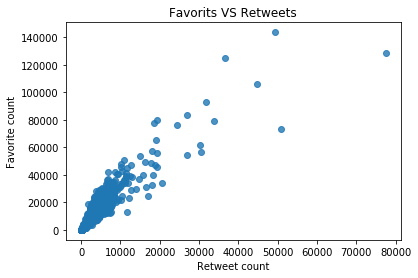

In [117]:
# Scatter plot to show the relation between favorits and retweets
ax =sns.regplot(x='retweet_count', y='favorite_count', data=df_twitter, 
                      fit_reg=False, ci=68, truncate=False) 
ax.set(xlabel='Retweet count', ylabel='Favorite count', title='Favorits VS Retweets')
plt.show()

As we expected the favorite and retweets are highly postive correlated.

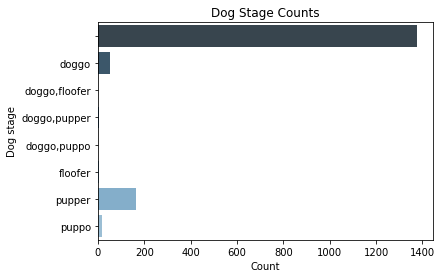

In [118]:
data = df_twitter.groupby('dog_stage').count()['tweet_id']
ax = sns.barplot(y=data.index, x=data.values, palette='Blues_d')
ax.set(xlabel='Count', ylabel='Dog stage', title='Dog Stage Counts')
plt.show()

As we can see the most common stage is pupper